In [ ]:
# Step 1: Install the required library
# In Google Colab, run this cell first to install the entsoe-py library.
# This library makes it easy to access the ENTSO-E API without dealing with raw HTTP requests.
!pip install entsoe-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.6 MB/s eta 0:00:00


In [ ]:
# Step 2: Import necessary libraries
# pandas is used for handling dates and data.
import numpy as np
import pandas as pd
import seaborn as sns
from entsoe import EntsoePandasClient
import matplotlib.pyplot as plt

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# Step 3: Get your ENTSO-E API key
# You need to register for a free API key at: https://transparency.entsoe.eu/
# Go to the website, create an account, and request access to the API.
# Once approved (usually quick), copy your security token (API key).
# Replace 'YOUR_API_KEY_HERE' below with your actual key.
api_key = "your-key"

# Step 4: Set up the client
# This creates a connection to the ENTSO-E API using your key.
client = EntsoePandasClient(api_key=api_key)

In [ ]:
# Define the date range (full day, using Europe/Berlin timezone for Germany)
start = pd.Timestamp('2024-01-01', tz='Europe/Berlin')
end = pd.Timestamp('2024-12-31', tz='Europe/Berlin')

# Country code for Germany, other options check: https://newtransparency.entsoe.eu/
country_code = 'DE_LU'

In [ ]:
# 1. Day-Ahead Prices: These are the prices from the day-ahead market auction, where electricity is traded for delivery the next day.
# Returns hourly prices in EUR/MWh.
day_ahead_prices = client.query_day_ahead_prices(country_code, start=start, end=end)
print(type(day_ahead_prices))
print(day_ahead_prices.index)       # the datetime index
print(day_ahead_prices.describe())  # stats: mean, min, max
day_ahead_prices.info()


<class 'pandas.core.series.Series'>
DatetimeIndex(['2024-01-01 00:00:00+01:00', '2024-01-01 01:00:00+01:00',
               '2024-01-01 02:00:00+01:00', '2024-01-01 03:00:00+01:00',
               '2024-01-01 04:00:00+01:00', '2024-01-01 05:00:00+01:00',
               '2024-01-01 06:00:00+01:00', '2024-01-01 07:00:00+01:00',
               '2024-01-01 08:00:00+01:00', '2024-01-01 09:00:00+01:00',
               ...
               '2024-12-30 14:00:00+01:00', '2024-12-30 15:00:00+01:00',
               '2024-12-30 16:00:00+01:00', '2024-12-30 17:00:00+01:00',
               '2024-12-30 18:00:00+01:00', '2024-12-30 19:00:00+01:00',
               '2024-12-30 20:00:00+01:00', '2024-12-30 21:00:00+01:00',
               '2024-12-30 22:00:00+01:00', '2024-12-30 23:00:00+01:00'],
              dtype='datetime64[ns, Europe/Berlin]', length=8760, freq=None)
count    8760.000000
mean       78.556991
std        52.776488
min      -135.450000
25%        55.560000
50%        79.625000
75%       1

In [ ]:
# Calculate daily average prices
daily_average = day_ahead_prices.resample('D').mean()

# Find the maximum and minimum price for each day
daily_max = day_ahead_prices.resample('D').max()
daily_min = day_ahead_prices.resample('D').min()

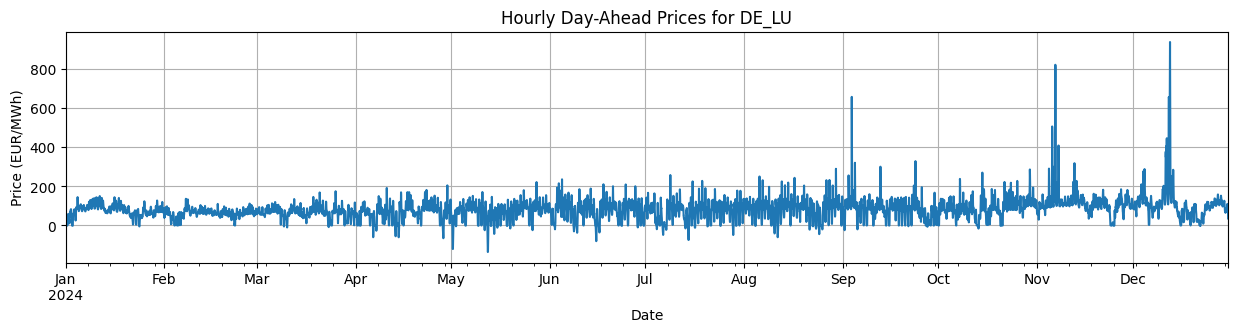

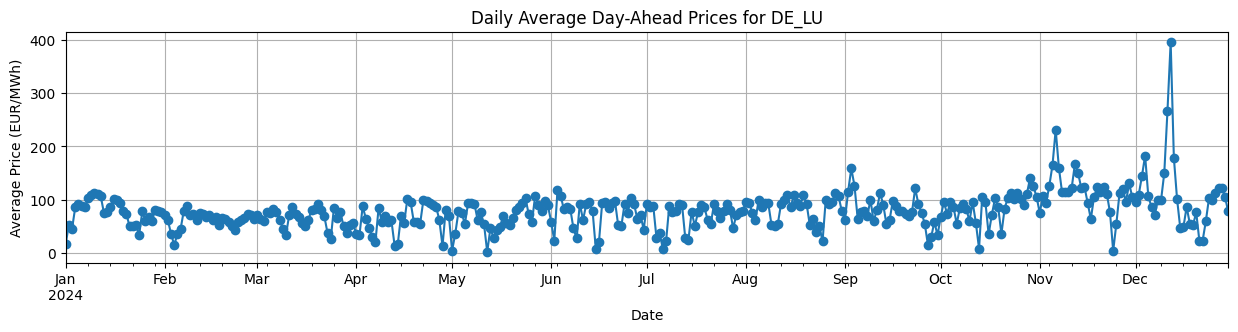

In [ ]:
# Plot the hourly day-ahead prices
day_ahead_prices.plot(figsize=(15, 3))
plt.title('Hourly Day-Ahead Prices for DE_LU')
plt.ylabel('Price (EUR/MWh)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# Plot the daily average prices
daily_average.plot(figsize=(15, 3), style='-o')
plt.title('Daily Average Day-Ahead Prices for DE_LU')
plt.ylabel('Average Price (EUR/MWh)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

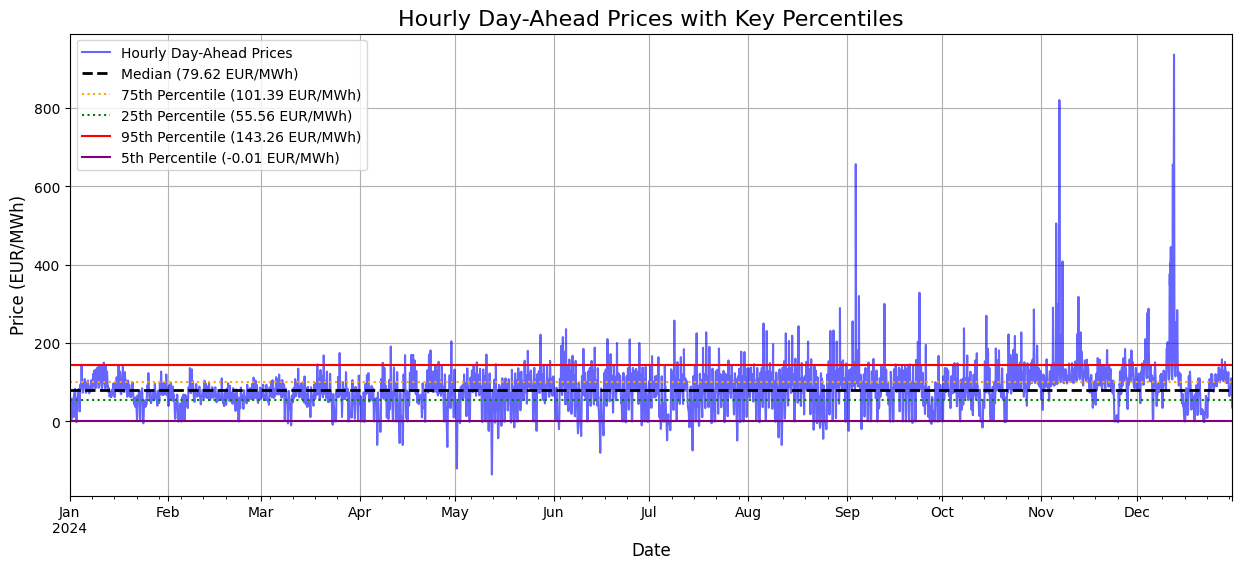

In [ ]:
# --- Calculate all key percentiles in one step ---
# This unpacks the values into new variables.
p05, p25, p50, p75, p95 = day_ahead_prices.quantile([0.05, 0.25, 0.50, 0.75, 0.95])

# --- Plot the hourly prices with all percentile lines ---
plt.figure(figsize=(15, 6))

# Plot the original hourly data
day_ahead_prices.plot(label='Hourly Day-Ahead Prices', color='blue', alpha=0.6)

# Add horizontal lines for each percentile
plt.axhline(y=p50, color='black', linestyle='--', linewidth=2, label=f'Median ({p50:.2f} EUR/MWh)')
plt.axhline(y=p75, color='orange', linestyle=':', linewidth=1.5, label=f'75th Percentile ({p75:.2f} EUR/MWh)')
plt.axhline(y=p25, color='green', linestyle=':', linewidth=1.5, label=f'25th Percentile ({p25:.2f} EUR/MWh)')
plt.axhline(y=p95, color='red', linestyle='-', linewidth=1.5, label=f'95th Percentile ({p95:.2f} EUR/MWh)')
plt.axhline(y=p05, color='purple', linestyle='-', linewidth=1.5, label=f'5th Percentile ({p05:.2f} EUR/MWh)')

# Add plot labels and a title
plt.title('Hourly Day-Ahead Prices with Key Percentiles', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (EUR/MWh)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

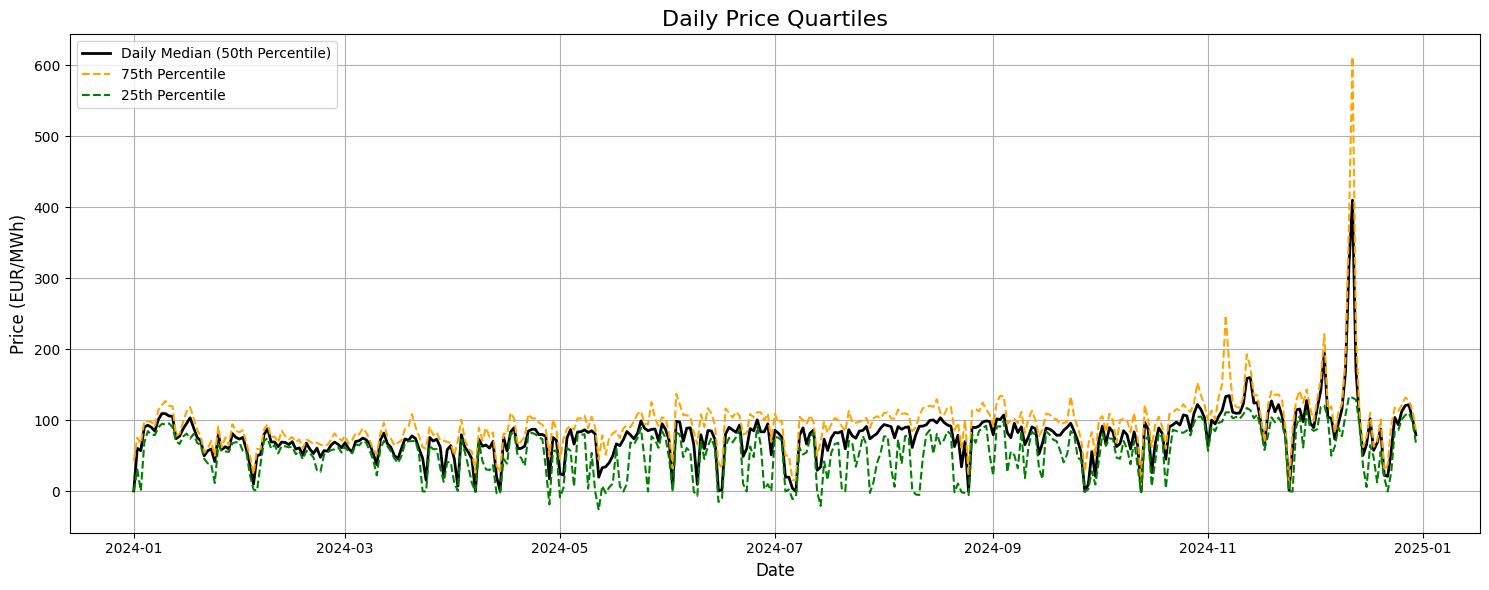

In [ ]:
# --- Calculate the daily 25th, 50th, and 75th percentiles ---
daily_quantiles = day_ahead_prices.resample('D').quantile([0.25, 0.50, 0.75])

# Unstack the data to put each percentile in its own column
df_daily_stats = daily_quantiles.unstack(level=0).T

# --- Workaround for the TypeError: Make the index timezone-naive ---
# This step is crucial if you are getting the "relativedelta" error
df_daily_stats.index = df_daily_stats.index.tz_localize(None)

# --- Plot the DataFrame ---
plt.figure(figsize=(15, 6))

plt.plot(df_daily_stats.index, df_daily_stats[0.50], label='Daily Median (50th Percentile)', color='black', linewidth=2)
plt.plot(df_daily_stats.index, df_daily_stats[0.75], label='75th Percentile', color='orange', linestyle='--', linewidth=1.5)
plt.plot(df_daily_stats.index, df_daily_stats[0.25], label='25th Percentile', color='green', linestyle='--', linewidth=1.5)

# Add plot labels and title
plt.title('Daily Price Quartiles', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (EUR/MWh)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

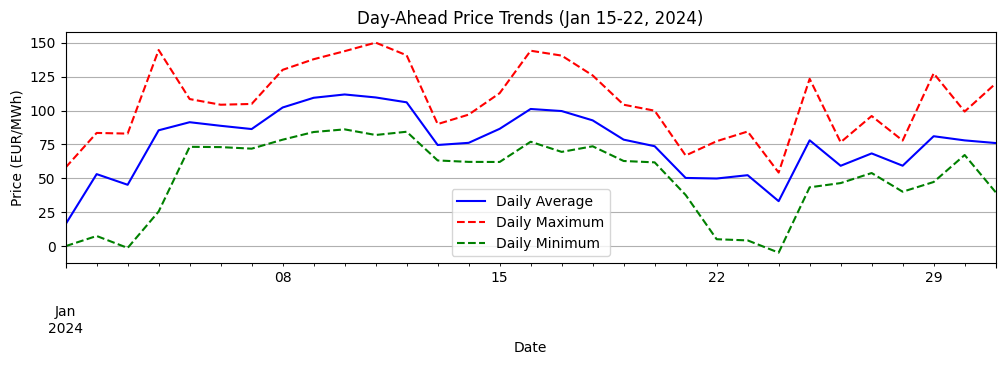

In [ ]:
# Define your plotting period with the timezone
start_plot = pd.Timestamp('2024-01-01', tz='Europe/Berlin')
end_plot = pd.Timestamp('2024-01-31', tz='Europe/Berlin')

# Now, slicing will work without error
average_subset = daily_average[start_plot:end_plot]
max_subset = daily_max[start_plot:end_plot]
min_subset = daily_min[start_plot:end_plot]

# And you can plot as before...
df_prices_subset = pd.DataFrame({
    'Daily Average': average_subset,
    'Daily Maximum': max_subset,
    'Daily Minimum': min_subset
})
df_prices_subset.plot(figsize=(12, 3), style=['-b', '--r', '--g'])
plt.title('Day-Ahead Price Trends (Jan 15-22, 2024)')
plt.xlabel('Date')
plt.ylabel('Price (EUR/MWh)')
plt.grid(True)
plt.legend()
plt.show()

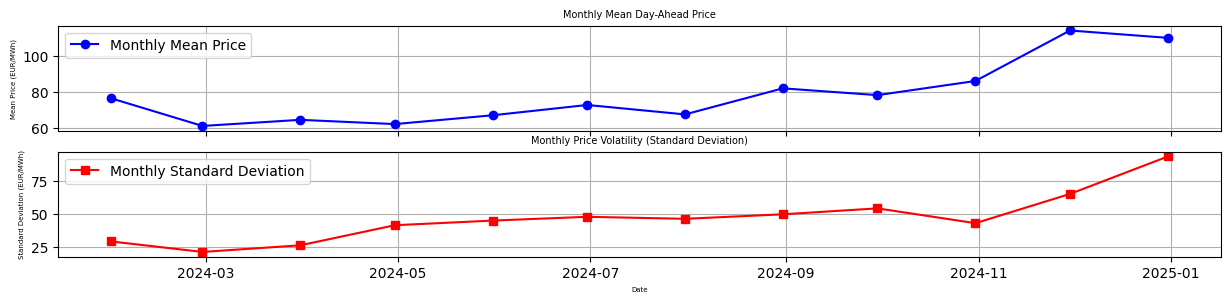

In [ ]:
# --- Calculate monthly mean and standard deviation ---
monthly_mean = day_ahead_prices.resample('ME').mean()
monthly_std = day_ahead_prices.resample('ME').std()

# --- Plot both metrics on separate subplots ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 3), sharex=True)

# Plot monthly mean
ax1.plot(monthly_mean.index, monthly_mean.values, label='Monthly Mean Price', color='blue', marker='o')
ax1.set_title('Monthly Mean Day-Ahead Price', fontsize=7)
ax1.set_ylabel('Mean Price (EUR/MWh)', fontsize=5)
ax1.grid(True)
ax1.legend()

# Plot monthly standard deviation
ax2.plot(monthly_std.index, monthly_std.values, label='Monthly Standard Deviation', color='red', marker='s')
ax2.set_title('Monthly Price Volatility (Standard Deviation)', fontsize=7)
ax2.set_xlabel('Date', fontsize=5)
ax2.set_ylabel('Standard Deviation (EUR/MWh)', fontsize=5)
ax2.grid(True)
ax2.legend()

plt.show()

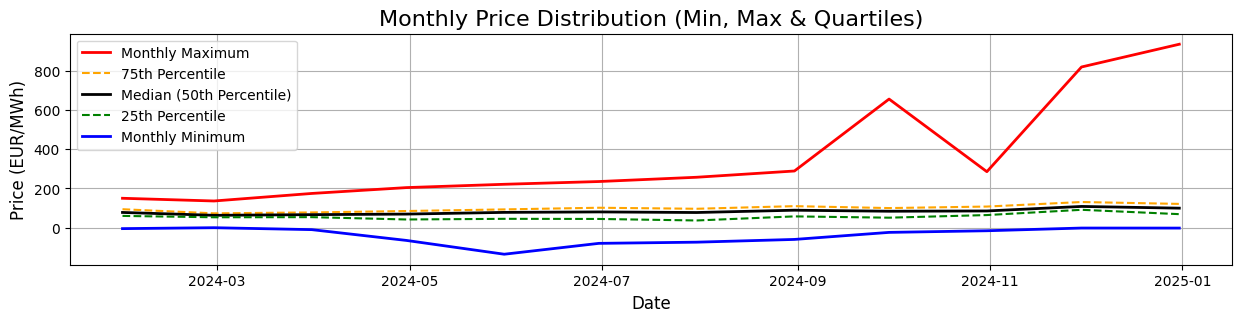

In [ ]:
# Assuming you have the hourly day_ahead_prices Series.

# --- Calculate monthly min, max, and quartiles ---
monthly_min = day_ahead_prices.resample('ME').min()
monthly_max = day_ahead_prices.resample('ME').max()
monthly_quantiles = day_ahead_prices.resample('ME').quantile([0.25, 0.50, 0.75]).unstack(level=0).T

# Combine all the data into a single DataFrame for plotting
monthly_stats = pd.DataFrame({
    'Min': monthly_min,
    '25th Percentile': monthly_quantiles[0.25],
    'Median': monthly_quantiles[0.50],
    '75th Percentile': monthly_quantiles[0.75],
    'Max': monthly_max
})

# --- Workaround for the TypeError: Make the index timezone-naive before plotting ---
# This is a key step to prevent known plotting errors with timezone data
monthly_stats.index = monthly_stats.index.tz_localize(None)

# --- Plot all metrics on a single figure ---
plt.figure(figsize=(15, 3))

plt.plot(monthly_stats.index, monthly_stats['Max'], label='Monthly Maximum', color='red', linestyle='-', linewidth=2)
plt.plot(monthly_stats.index, monthly_stats['75th Percentile'], label='75th Percentile', color='orange', linestyle='--', linewidth=1.5)
plt.plot(monthly_stats.index, monthly_stats['Median'], label='Median (50th Percentile)', color='black', linestyle='-', linewidth=2)
plt.plot(monthly_stats.index, monthly_stats['25th Percentile'], label='25th Percentile', color='green', linestyle='--', linewidth=1.5)
plt.plot(monthly_stats.index, monthly_stats['Min'], label='Monthly Minimum', color='blue', linestyle='-', linewidth=2)

# Add plot labels and title
plt.title('Monthly Price Distribution (Min, Max & Quartiles)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (EUR/MWh)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

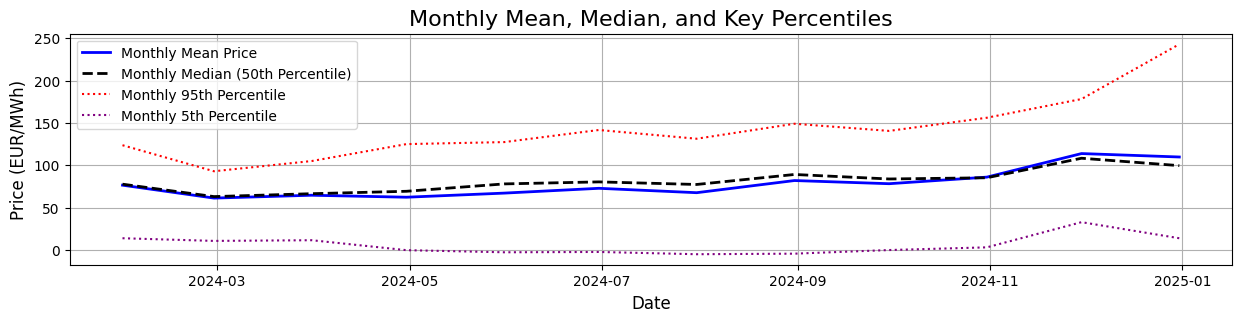

In [ ]:
# Assuming you have the hourly day_ahead_prices Series.

# --- Calculate monthly mean and 5th, 50th, and 95th percentiles ---
monthly_mean = day_ahead_prices.resample('ME').mean()
monthly_quantiles = day_ahead_prices.resample('ME').quantile([0.05, 0.50, 0.95])

# Combine all the data into a single DataFrame with correct column names
monthly_stats = pd.DataFrame({
    'Mean': monthly_mean,
    'Median': monthly_quantiles.loc[:, 0.50],
    '5th Percentile': monthly_quantiles.loc[:, 0.05],
    '95th Percentile': monthly_quantiles.loc[:, 0.95]
})

# --- Workaround for the TypeError: Make the index timezone-naive before plotting ---
# This is a key step to prevent known plotting errors with timezone data
monthly_stats.index = monthly_stats.index.tz_localize(None)

# --- Plot the DataFrame ---
plt.figure(figsize=(15, 3))

plt.plot(monthly_stats.index, monthly_stats['Mean'], label='Monthly Mean Price', color='blue', linestyle='-', linewidth=2)
plt.plot(monthly_stats.index, monthly_stats['Median'], label='Monthly Median (50th Percentile)', color='black', linestyle='--', linewidth=2)
plt.plot(monthly_stats.index, monthly_stats['95th Percentile'], label='Monthly 95th Percentile', color='red', linestyle=':', linewidth=1.5)
plt.plot(monthly_stats.index, monthly_stats['5th Percentile'], label='Monthly 5th Percentile', color='purple', linestyle=':', linewidth=1.5)

# Add plot labels and a title
plt.title('Monthly Mean, Median, and Key Percentiles', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (EUR/MWh)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

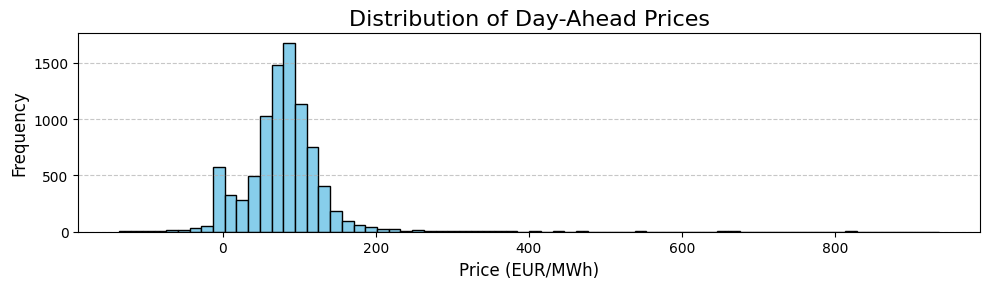

In [ ]:
plot_data_hist = day_ahead_prices.tz_localize(None)

plt.figure(figsize=(10, 3))
plt.hist(plot_data_hist, bins=70, edgecolor='black', color='skyblue')
plt.title('Distribution of Day-Ahead Prices', fontsize=16)
plt.xlabel('Price (EUR/MWh)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

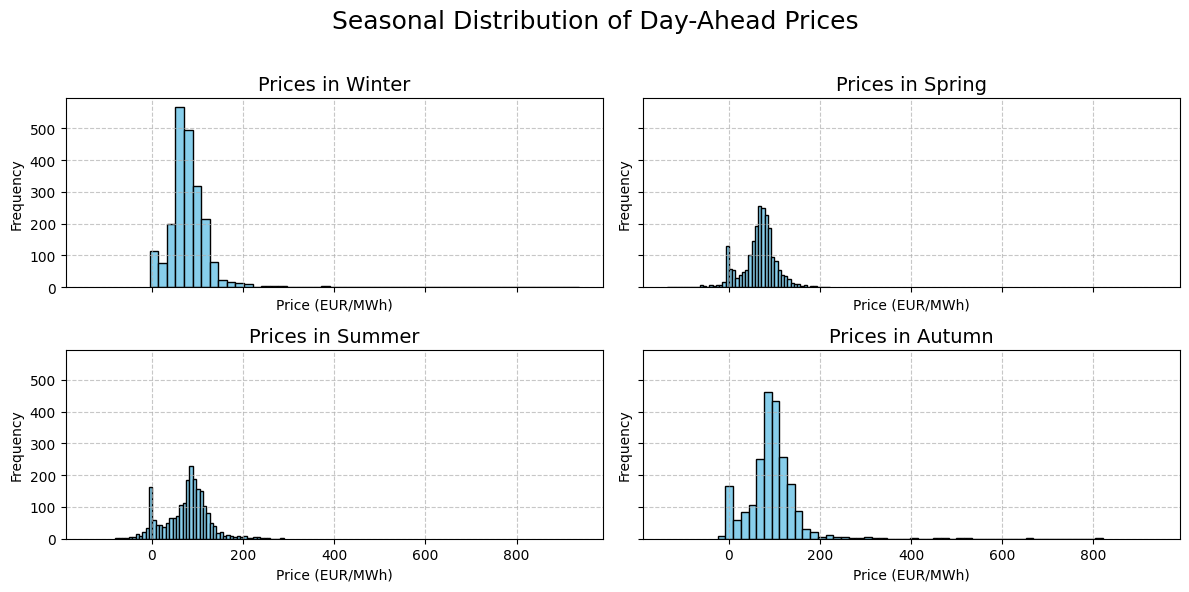

In [ ]:
# Assuming you have the hourly day_ahead_prices Series.

# Create a DataFrame from the Series and add a 'season' column
df = day_ahead_prices.to_frame(name='price')
month_to_season = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}
df['season'] = df.index.month.map(month_to_season)

# Workaround for the TypeError: Make the index timezone-naive before plotting
df.index = df.index.tz_localize(None)

# Plot seasonal histograms
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), sharex=True, sharey=True)
axes = axes.flatten()

for i, season in enumerate(seasons):
    ax = axes[i]
    season_data = df[df['season'] == season]['price']

    if not season_data.empty:
        ax.hist(season_data, bins=50, edgecolor='black', color='skyblue')
        ax.set_title(f'Prices in {season}', fontsize=14)
        ax.grid(True, linestyle='--', alpha=0.7)

    ax.set_xlabel('Price (EUR/MWh)', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

fig.suptitle('Seasonal Distribution of Day-Ahead Prices', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust rect to make room for suptitle
plt.show()

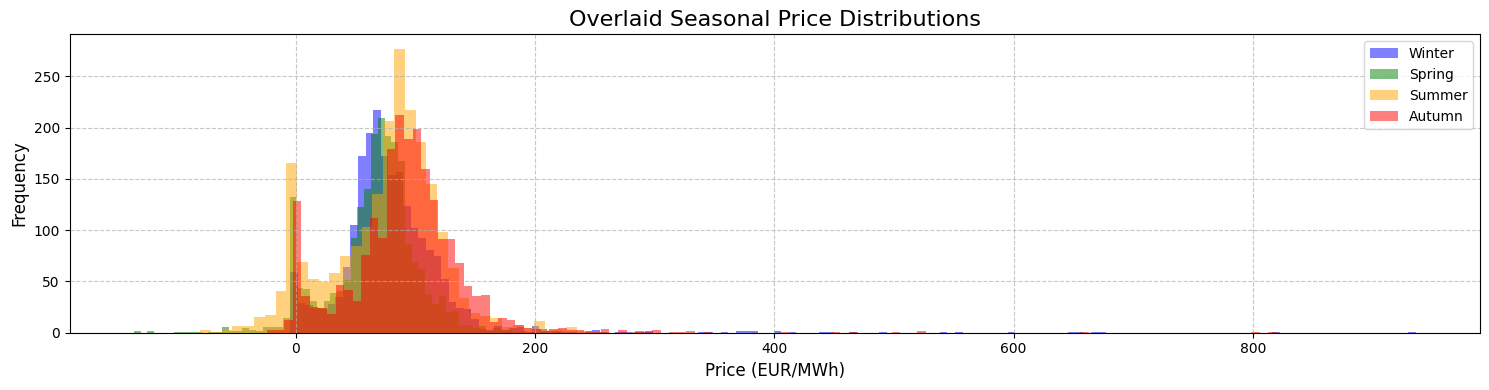

In [ ]:
# Assuming you have the hourly day_ahead_prices Series.

# Create a DataFrame from the Series and add a 'season' column
df = day_ahead_prices.to_frame(name='price')
month_to_season = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}
df['season'] = df.index.month.map(month_to_season)

# Workaround for the TypeError: Make the index timezone-naive before plotting
df.index = df.index.tz_localize(None)

# Plot all seasonal histograms on a single figure
plt.figure(figsize=(15, 4))

seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
colors = ['blue', 'green', 'orange', 'red']
bins = 'auto' # Set bins to 'auto' for dynamic binning

for i, season in enumerate(seasons):
    season_data = df[df['season'] == season]['price']

    if not season_data.empty:
        plt.hist(season_data, bins=bins, color=colors[i], alpha=0.5, label=season, edgecolor='none')

plt.title('Overlaid Seasonal Price Distributions', fontsize=16)
plt.xlabel('Price (EUR/MWh)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

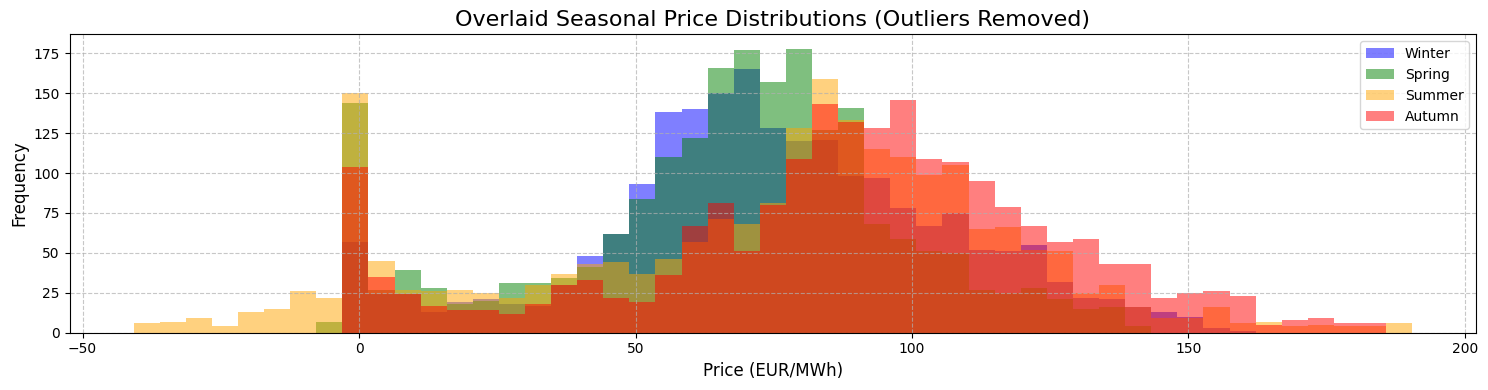

In [ ]:
# Assuming you have the hourly day_ahead_prices Series.

# Create a DataFrame from the Series and add a 'season' column
df = day_ahead_prices.to_frame(name='price')
month_to_season = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}
df['season'] = df.index.month.map(month_to_season)

# Workaround for the TypeError: Make the index timezone-naive before plotting
df.index = df.index.tz_localize(None)

# Remove outliers for each season separately using the IQR method
filtered_dfs = []
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
for season in seasons:
    season_data = df[df['season'] == season]
    if not season_data.empty:
        q1 = season_data['price'].quantile(0.25)
        q3 = season_data['price'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        filtered_season_data = season_data[(season_data['price'] >= lower_bound) & (season_data['price'] <= upper_bound)]
        filtered_dfs.append(filtered_season_data)

# Combine filtered data back into a single DataFrame for plotting
if filtered_dfs:
    filtered_df = pd.concat(filtered_dfs)

    # Plot the histograms of the filtered data
    plt.figure(figsize=(15, 4))
    colors = ['blue', 'green', 'orange', 'red']

    all_filtered_prices = filtered_df['price'].values
    if all_filtered_prices.size > 0:
        bins = np.linspace(all_filtered_prices.min(), all_filtered_prices.max(), 50)
    else:
        bins = 50

    for i, season in enumerate(seasons):
        season_data = filtered_df[filtered_df['season'] == season]['price']
        if not season_data.empty:
            plt.hist(season_data, bins=bins, color=colors[i], alpha=0.5, label=season, edgecolor='none')

    plt.title('Overlaid Seasonal Price Distributions (Outliers Removed)', fontsize=16)
    plt.xlabel('Price (EUR/MWh)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
negative_prices = day_ahead_prices[day_ahead_prices < 0]

# Filter for prices above a certain threshold (e.g., prices over 150 EUR/MWh)
price_spikes = day_ahead_prices[day_ahead_prices > 150]

#Volatility Charts
Volatility is the measure of how much a price fluctuates or deviates from its average. A volatility chart plots this measure over time, typically using a rolling standard deviation, to show how unstable the market was during specific periods.

To create one, you would calculate the standard deviation of prices for a specific period (e.g., daily, weekly, or monthly) and plot that value on a time series chart.

#Analysis and Interpretation:

Volatility Clustering: A key pattern in volatility charts is volatility clustering. This means that periods of high volatility tend to be followed by more periods of high volatility, and periods of low volatility are followed by periods of low volatility. This is a critical insight for risk management, as it suggests that a volatile day is a signal to prepare for more volatile days ahead.

Seasonal Patterns: Volatility charts can also reveal seasonal patterns. For example, in electricity markets, volatility often spikes during peak demand seasons (e.g., cold winters or hot summers) due to supply constraints.

Impact of Events: Large spikes on a volatility chart are often correlated with major market events, such as a power plant outage, a sudden change in weather forecasts, or a policy announcement.

For a market specialist, a volatility chart is your most important tool for risk management. It helps you identify when the market is most unstable, informing your hedging strategies and trading decisions.

Volatility as a Trading Signal
For a market specialist, volatility isn't just a measure of risk; it's also a trading signal.

High Volatility: Periods of high volatility can present opportunities for short-term trading. However, they are also dangerous and require robust risk management.

Low Volatility: Conversely, periods of low volatility can lead to complacency. A sudden spike can catch unprepared traders off guard. It's often a sign that a major price change is building up.

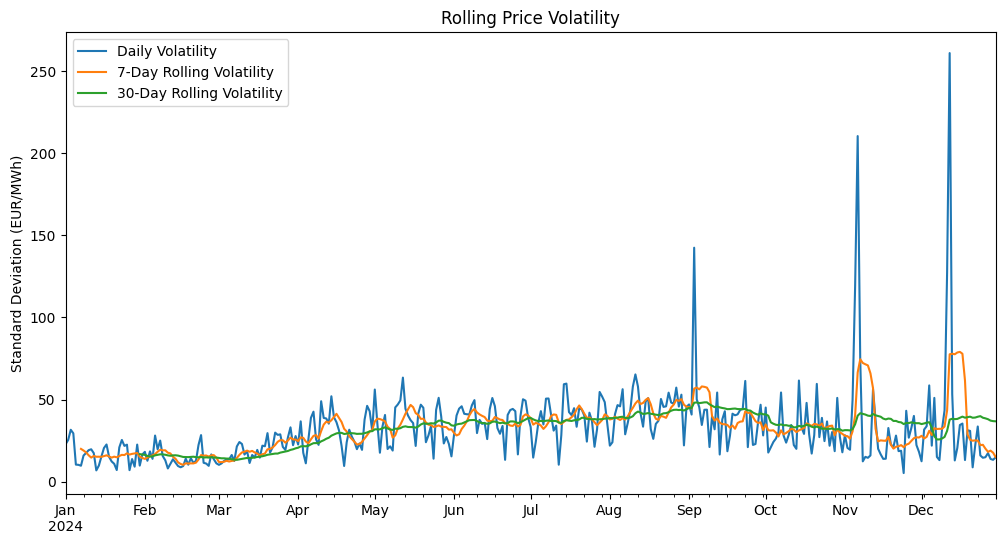

In [ ]:
# Calculate the daily standard deviation of hourly prices
daily_std = day_ahead_prices.resample('D').std()

# Calculate the rolling 7-day standard deviation
rolling_7d_std = daily_std.rolling(window=7).mean()

# Calculate the rolling 30-day standard deviation
rolling_30d_std = daily_std.rolling(window=30).mean()

# Now, you can plot these to visualize the trend
daily_std.plot(figsize=(12, 6), label='Daily Volatility')
rolling_7d_std.plot(label='7-Day Rolling Volatility')
rolling_30d_std.plot(label='30-Day Rolling Volatility')
plt.title('Rolling Price Volatility')
plt.ylabel('Standard Deviation (EUR/MWh)')
plt.legend()
plt.show()

In [ ]:
# Calculate hourly price change (difference from the previous hour)
hourly_change = day_ahead_prices.diff()

# Calculate the standard deviation of hourly prices to measure volatility
# A higher standard deviation indicates greater price swings
hourly_volatility = day_ahead_prices.resample('D').std()
# Assuming you have the hourly_change Series
# Calculate descriptive statistics, including percentiles
change_stats = hourly_change.describe(percentiles=[.05, .25, .50, .75, .95])

print(change_stats)

count    8759.000000
mean        0.004060
std        21.331198
min      -355.080000
5%        -24.211000
25%        -7.625000
50%        -0.960000
75%         6.165000
95%        29.301000
max       423.810000
dtype: float64
